Dataset loaded successfully!
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Shape of feature data (X): (569, 30)
Shape of target data (y): (569,)
Target classes: ['malignant' 'benign']
------------------------------
Exploratory Data Analysis:
First 5 rows of the feature data:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90    

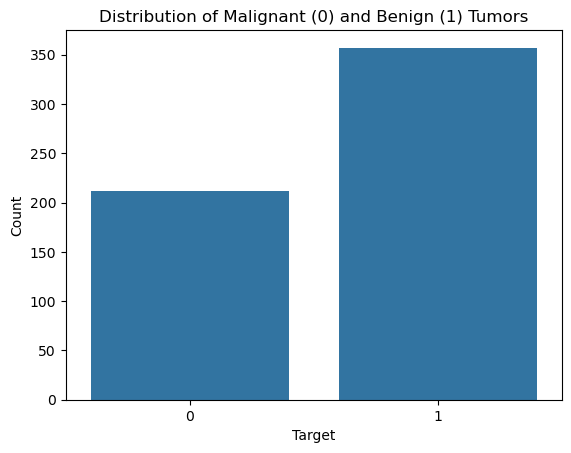

------------------------------


In [1]:
#Importing necessary libraries and modules
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load the Dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

print("Dataset loaded successfully!")
print(f"Feature names: {cancer.feature_names}")
print(f"Shape of feature data (X): {X.shape}")
print(f"Shape of target data (y): {y.shape}")
print(f"Target classes: {cancer.target_names}")
print("-" * 30)

# Step 3: Exploratory Data Analysis (EDA)
print("Exploratory Data Analysis:")
print(f"First 5 rows of the feature data:")
print(X.head())
print("-" * 30)

print("Summary statistics of the feature data:")
print(X.describe())
print("-" * 30)

print("Checking for missing values:")
print(X.isnull().sum())
print("-" * 30)

print("Distribution of the target variable:")
print(y.value_counts())
sns.countplot(x=y)
plt.title('Distribution of Malignant (0) and Benign (1) Tumors')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()
print("-" * 30)

In [3]:
# Step 4: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=cancer.feature_names)

print("Standardization completed!")
print(f"First 5 rows of the scaled feature data:")
print(X_scaled_df.head())
print(f"Mean of the first feature after scaling: {X_scaled_df.iloc[:, 0].mean():.4f}")
print(f"Standard deviation of the first feature after scaling: {X_scaled_df.iloc[:, 0].std():.4f}")
print("-" * 30)

Standardization completed!
First 5 rows of the scaled feature data:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimensio

PCA Implementation (Explained Variance):
Explained variance ratio for each principal component:
[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]

Cumulative explained variance ratio:
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


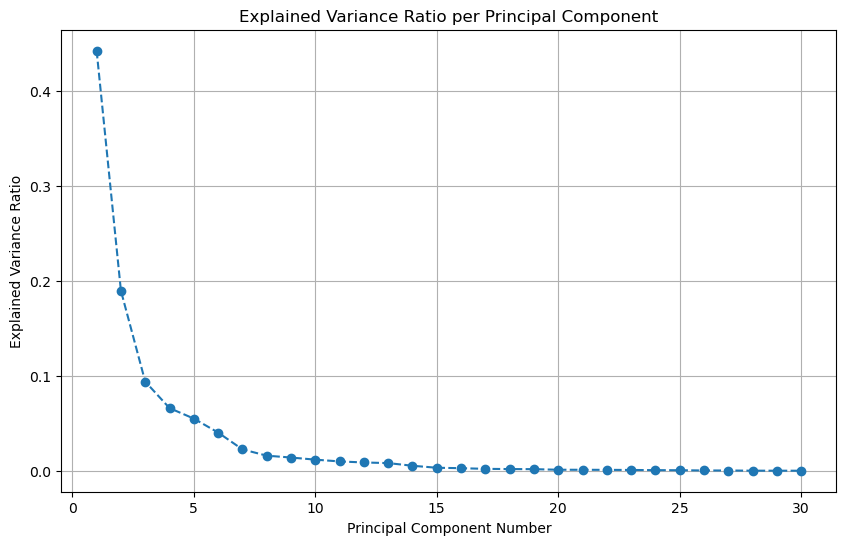

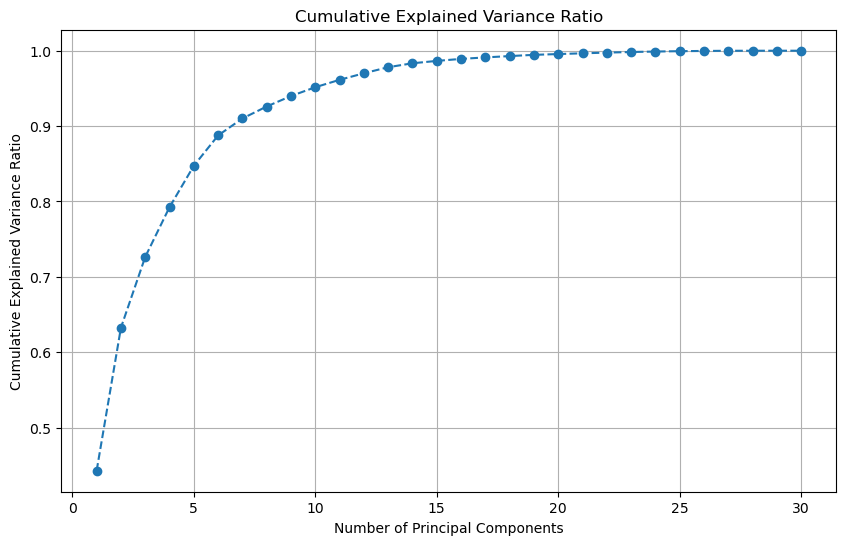

------------------------------


In [5]:
# Step 5: PCA Implementation (Calculating Explained Variance)
pca_all = PCA()
pca_all.fit(X_scaled)

explained_variance_ratio = pca_all.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

print("PCA Implementation (Explained Variance):")
print(f"Explained variance ratio for each principal component:\n{explained_variance_ratio}")
print(f"\nCumulative explained variance ratio:\n{cumulative_explained_variance}")

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio per Principal Component')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()
print("-" * 30)

Dimensionality Reduction to 2 Principal Components completed!
First 5 rows of the reduced dataset:
        PC1        PC2  target
0  9.192837   1.948583       0
1  2.387802  -3.768172       0
2  5.733896  -1.075174       0
3  7.122953  10.275589       0
4  3.935302  -1.948072       0
------------------------------


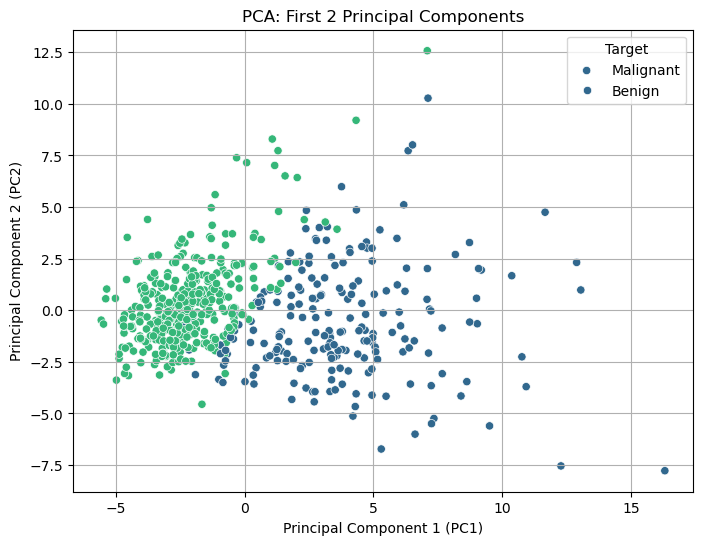

------------------------------


In [7]:
# Step 6: Dimensionality Reduction (Reducing to 2 principal components)
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(X_pca_2, columns=['PC1', 'PC2'])
df_pca['target'] = y  # Add target column for visualization

print("Dimensionality Reduction to 2 Principal Components completed!")
print("First 5 rows of the reduced dataset:")
print(df_pca.head())
print("-" * 30)

# Visualize the reduced data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, palette='viridis')
plt.title('PCA: First 2 Principal Components')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Target', labels=['Malignant', 'Benign'])
plt.grid(True)
plt.show()
print("-" * 30)

Bonus: Logistic Regression with PCA-transformed Data
Accuracy of Logistic Regression on PCA-transformed data: 0.9708

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171


Confusion Matrix:
[[ 60   3]
 [  2 106]]


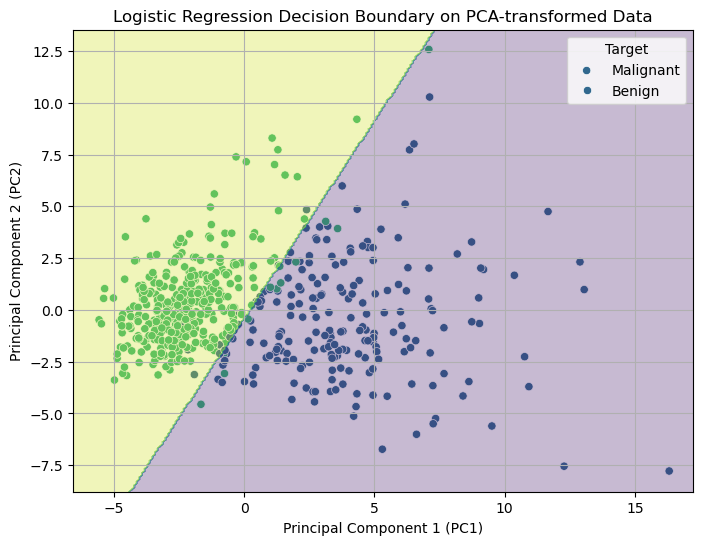

In [9]:
# Bonus: Logistic Regression using PCA-transformed data
print("Bonus: Logistic Regression with PCA-transformed Data")

# Split the data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(df_pca[['PC1', 'PC2']], df_pca['target'], test_size=0.3, random_state=42)

# Train a Logistic Regression model
logistic_model_pca = LogisticRegression(random_state=42)
logistic_model_pca.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_pca = logistic_model_pca.predict(X_test_pca)

# Evaluate the model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy of Logistic Regression on PCA-transformed data: {accuracy_pca:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_pca))

# Visualize the decision boundary (optional, for 2D PCA)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, palette='viridis')

# Create a meshgrid for plotting the decision boundary
import numpy as np
x_min, x_max = X_pca_2[:, 0].min() - 1, X_pca_2[:, 0].max() + 1
y_min, y_max = X_pca_2[:, 1].min() - 1, X_pca_2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Create a DataFrame from the meshgrid points with correct column names
meshgrid_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['PC1', 'PC2'])

# Make predictions using the DataFrame
Z = logistic_model_pca.predict(meshgrid_data)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.title('Logistic Regression Decision Boundary on PCA-transformed Data')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Target', labels=['Malignant', 'Benign'])
plt.grid(True)
plt.show()